In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 지역화폐 데이터 준비

In [3]:
money_df = pd.read_csv('/content/drive/MyDrive/DSL/EDA프로젝트/지역화폐발행및이용현황.csv')
money_df.head()

,시군명,기준년월,월별카드발행수량(건),월별카드충전액(천원),월별카드사용액(천원),월별모바일상품권이용등록자수(명),월별모바일충전액(천원),월별모바일사용액(천원),월별지류상품권판매액(천원),월별지류상품권회수액(천원)
0,가평군,Jun.22,572.0,2771279.0,2681386.0,NaN,NaN,NaN,350130.0,266475.0
1,가평군,May.22,627.0,2784295.0,2810484.0,NaN,NaN,NaN,213080.0,133195.0
2,가평군,Apr.22,641.0,2585608.0,2600843.0,NaN,NaN,NaN,130194.0,117225.0
3,가평군,Mar.22,481.0,2393457.0,2418270.0,NaN,NaN,NaN,120715.0,127420.0
4,가평군,Feb.22,427.0,2063838.0,1920192.0,NaN,NaN,NaN,111400.0,140825.0


In [4]:
money_df.fillna(0, inplace = True)
money_df['발행액(천원)'] = money_df['월별카드충전액(천원)'] + money_df['월별모바일충전액(천원)'] + money_df['월별지류상품권판매액(천원)']
money_df['이용액(천원)'] = money_df['월별카드사용액(천원)'] + money_df['월별모바일사용액(천원)'] + money_df['월별지류상품권회수액(천원)']
money_df1 = money_df.iloc[:, [0,1,10,11]]

In [5]:
money_df1

,시군명,기준년월,발행액(천원),이용액(천원)
0,가평군,Jun.22,3121409.0,2947861.0
1,가평군,May.22,2997375.0,2943679.0
2,가평군,Apr.22,2715802.0,2718068.0
3,가평군,Mar.22,2514172.0,2545690.0
4,가평군,Feb.22,2175238.0,2061017.0
...,...,...,...,...
1297,화성시,May.19,4449088.0,1392631.0
1298,화성시,Apr.19,1476982.0,204210.0
1299,화성시,Mar.19,0.0,0.0
1300,화성시,Feb.19,0.0,0.0


# 지역별 골목상권 점포수 변화 추이 데이터 준비

In [6]:
market_df = pd.read_csv('/content/drive/MyDrive/DSL/EDA프로젝트/market_crawling.csv', index_col = 0)
market_df

,행정구역,생활밀접업종,2019년 1분기,2019년 1분기.1,2019년 1분기.2,2019년 2분기,2019년 2분기.1,2019년 2분기.2,2019년 3분기,2019년 3분기.1,...,2021년 2분기.2,2021년 3분기,2021년 3분기.1,2021년 3분기.2,2021년 4분기,2021년 4분기.1,2021년 4분기.2,2022년 1분기,2022년 1분기.1,2022년 1분기.2
0,경기도,전체업종전체,49492,6078,43414,49823,6143,43680,50379,6279,...,45818,52744,6914,45830,52814,6973,45841,53254,7010,46244
1,수원시,전체업종전체,7288,907,6381,7345,906,6439,7357,913,...,6655,7664,1007,6657,7692,1036,6656,7741,1038,6703
2,수원시 장안구,전체업종전체,2196,255,1941,2210,254,1956,2225,258,...,1982,2246,282,1964,2252,289,1963,2284,287,1997
3,수원시 권선구,전체업종전체,2821,378,2443,2850,378,2472,2850,379,...,2562,2982,415,2567,2995,423,2572,3005,429,2576
4,수원시 팔달구,전체업종전체,1147,115,1032,1148,115,1033,1136,117,...,1045,1193,145,1048,1199,151,1048,1190,149,1041
5,수원시 영통구,전체업종전체,1124,159,965,1137,159,978,1146,159,...,1066,1243,165,1078,1246,173,1073,1262,173,1089
6,성남시,전체업종전체,5269,572,4697,5289,584,4705,5315,594,...,4804,5358,582,4776,5360,578,4782,5365,573,4792
7,성남시 수정구,전체업종전체,1371,129,1242,1375,131,1244,1378,134,...,1225,1339,129,1210,1329,129,1200,1321,129,1192
8,성남시 중원구,전체업종전체,1814,172,1642,1820,172,1648,1831,175,...,1677,1818,155,1663,1818,151,1667,1818,145,1673
9,성남시 분당구,전체업종전체,2084,271,1813,2094,281,1813,2106,285,...,1902,2201,298,1903,2213,298,1915,2226,299,1927


In [7]:
market_df.drop(market_df[market_df['행정구역'].str.contains(' ')].index, inplace = True)
market_df.drop('생활밀접업종', axis = 1, inplace = True)
market_df.reset_index(inplace = True)
market_df.drop('index', axis = 1, inplace = True)
market_change_df = pd.DataFrame(market_df['행정구역']).join(market_df.iloc[:, 1:42:3], how = 'inner')

In [8]:
market_change_df.head()

,행정구역,2019년 1분기,2019년 2분기,2019년 3분기,2019년 4분기,2020년 1분기,2020년 2분기,2020년 3분기,2020년 4분기,2021년 1분기,2021년 2분기,2021년 3분기,2021년 4분기,2022년 1분기
0,경기도,49492,49823,50379,51001,50964,51448,51624,51852,52173,52677,52744,52814,53254
1,수원시,7288,7345,7357,7431,7432,7485,7478,7525,7572,7652,7664,7692,7741
2,성남시,5269,5289,5315,5358,5321,5368,5376,5384,5389,5391,5358,5360,5365
3,의정부시,1696,1696,1695,1713,1710,1721,1719,1716,1721,1737,1735,1719,1724
4,안양시,2975,2973,2986,2998,2976,2989,2984,2980,2980,2973,2968,2969,2995


# 데이터 merge

In [15]:
market_df1 = pd.DataFrame(market_change_df.iloc[:,1:].stack(0)).reset_index()
list(market_change_df['행정구역'])
place_list = []

for i in list(market_change_df['행정구역']):
  place_list.extend([i]*13)

market_df1['level_0'] = place_list
market_df1.columns = ['시군명', '기준년월', '매장수']

market_df2 = market_df1.drop(market_df1[:13].index).reset_index()
market_df2

,index,시군명,기준년월,매장수
0,13,수원시,2019년 1분기,7288
1,14,수원시,2019년 2분기,7345
2,15,수원시,2019년 3분기,7357
3,16,수원시,2019년 4분기,7431
4,17,수원시,2020년 1분기,7432
...,...,...,...,...
398,411,양평군,2021년 1분기,986
399,412,양평군,2021년 2분기,989
400,413,양평군,2021년 3분기,988
401,414,양평군,2021년 4분기,982


In [10]:
for i in range(1, 1303, 3):
  money_df1.loc[i, '발행액(천원)'] = money_df1.loc[i-1, '발행액(천원)'] + money_df1.loc[i, '발행액(천원)'] + money_df1.loc[i+1, '발행액(천원)']
  money_df1.loc[i, '이용액(천원)'] = money_df1.loc[i-1]['이용액(천원)'] + money_df1.loc[i]['이용액(천원)'] + money_df1.loc[i+1]['이용액(천원)']

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:
money_df2 = money_df1.iloc[1:1303:3, :].reset_index()
money_df2.drop(money_df2[money_df2['기준년월'] == 'May.22'].index, inplace = True)

In [13]:
money_df2.replace('Feb.22', '2022년 1분기', inplace = True)
money_df2.replace('Nov.21', '2021년 4분기', inplace = True)
money_df2.replace('Aug.21', '2021년 3분기', inplace = True)
money_df2.replace('May.21', '2021년 2분기', inplace = True)
money_df2.replace('Feb.21', '2021년 1분기', inplace = True)
money_df2.replace('Nov.20', '2020년 4분기', inplace = True)
money_df2.replace('Aug.20', '2020년 3분기', inplace = True)
money_df2.replace('May.20', '2020년 2분기', inplace = True)
money_df2.replace('Feb.20', '2020년 1분기', inplace = True)
money_df2.replace('Nov.19', '2019년 4분기', inplace = True)
money_df2.replace('Aug.19', '2019년 3분기', inplace = True)
money_df2.replace('May.19', '2019년 2분기', inplace = True)
money_df2.replace('Feb.19', '2019년 1분기', inplace = True)

In [16]:
placemoney_df = pd.merge(market_df2, money_df2, how = 'left', on = ['시군명', '기준년월'])
placemoney_df.drop(['index_x', 'index_y'], axis = 1, inplace = True)
placemoney_df

,시군명,기준년월,매장수,발행액(천원),이용액(천원)
0,수원시,2019년 1분기,7288,0.0,0.0
1,수원시,2019년 2분기,7345,7835777.0,4152471.0
2,수원시,2019년 3분기,7357,9316086.0,8486183.0
3,수원시,2019년 4분기,7431,12262045.0,10057582.0
4,수원시,2020년 1분기,7432,14949260.0,10951532.0
...,...,...,...,...,...
398,양평군,2021년 1분기,986,13540144.0,12768734.0
399,양평군,2021년 2분기,989,18091207.0,19534436.0
400,양평군,2021년 3분기,988,16318371.0,16537665.0
401,양평군,2021년 4분기,982,16900118.0,16421096.0


# 시각화 및 통계분석

In [57]:
import statsmodels.formula.api
from scipy import stats

In [58]:
corr_list = []

In [59]:
def plot_corr(place): # 지역별로 상관계수 및 시각화 함수 설정
  global corr_list
  print('다음 지역은 {}입니다'.format(place))
  place_df = placemoney_df[placemoney_df['시군명'] == place]
  scaler = MinMaxScaler() # 스케일링 진행
  scaler.fit(place_df.iloc[:, 2:])
  scaled_df = pd.DataFrame(scaler.transform(place_df.iloc[:, 2:])) 
  print(scaled_df.corr(method = 'pearson').iloc[1,0])
  corr_list.append(scaled_df.corr(method = 'pearson').iloc[1,0])
  plt.figure(figsize = (15,8))
  plt.ylabel('분기')
  plt.xlabel('매장수/발행액')
  plt.plot(place_df['기준년월'], scaled_df[0], c = 'r', label = '매장수')
  plt.plot(place_df['기준년월'], scaled_df[1], c = 'b', label = '발행액')
  plt.legend(loc = 'upper right')
  plt.show()
  scaled_df.columns = ['점포수', '발행액', '이용액']
  mod = statsmodels.formula.api.ols('점포수 ~ 발행액', data = scaled_df)
  reg_result = mod.fit()
  print(reg_result.summary())
  print('-'*20)

In [21]:
place_list = list(placemoney_df['시군명'].unique())

다음 지역은 수원시입니다
0.9624154201448384


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

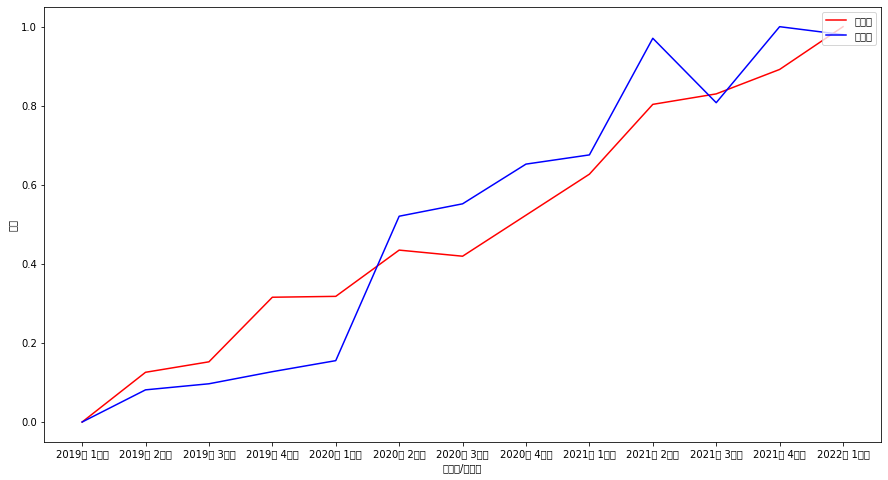

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.44e-07
Time:                        13:32:50   Log-Likelihood:                 13.934
No. Observations:                  13   AIC:                            -23.87
Df Residuals:                      11   BIC:                            -22.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0819      0.043      1.897      0.0

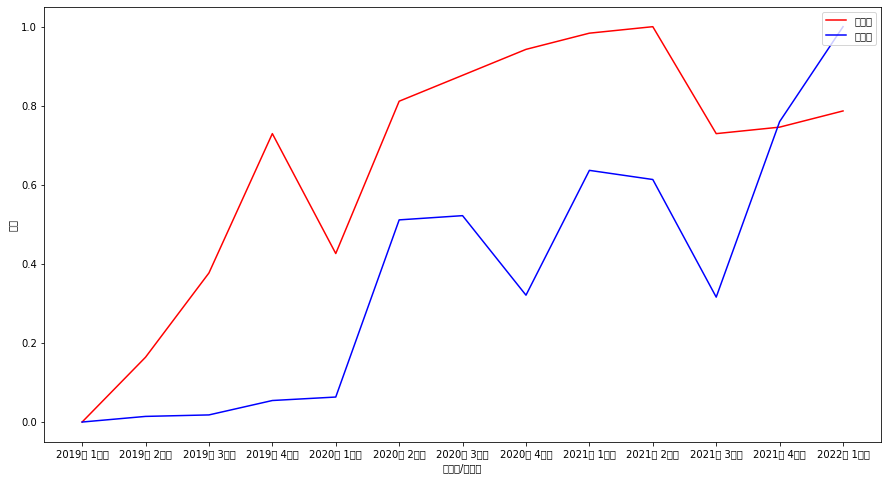

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     10.80
Date:                Mon, 16 Jan 2023   Prob (F-statistic):            0.00725
Time:                        13:32:51   Log-Likelihood:                 1.3812
No. Observations:                  13   AIC:                             1.238
Df Residuals:                      11   BIC:                             2.368
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4070      0.101      4.029      0.0

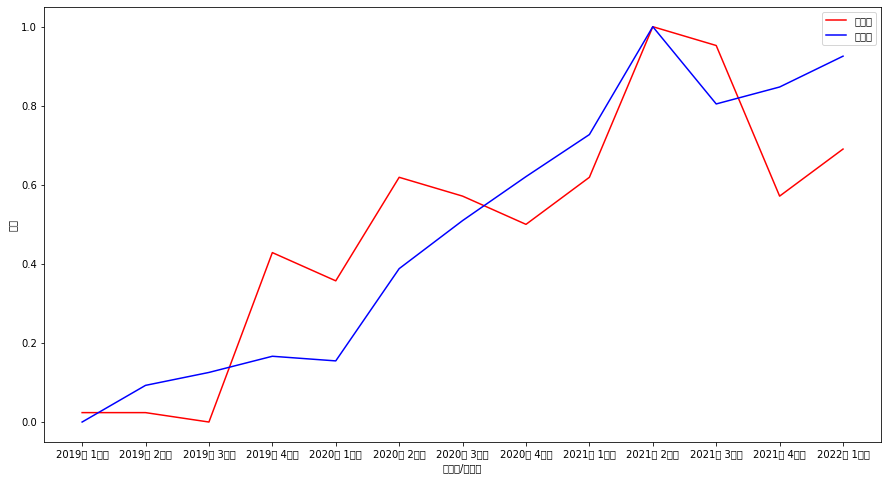

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     34.48
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000107
Time:                        13:32:51   Log-Likelihood:                 5.9655
No. Observations:                  13   AIC:                            -7.931
Df Residuals:                      11   BIC:                            -6.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1001      0.081      1.240      0.2

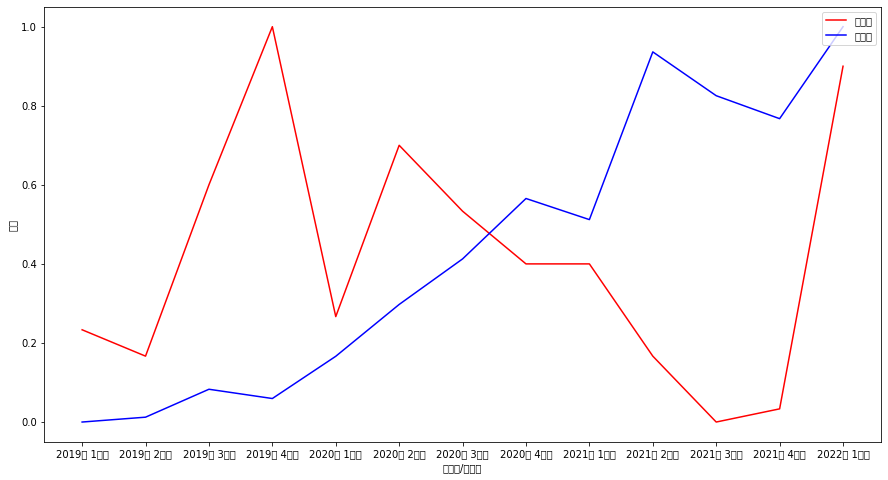

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.3591
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.561
Time:                        13:32:51   Log-Likelihood:                -2.7697
No. Observations:                  13   AIC:                             9.539
Df Residuals:                      11   BIC:                             10.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4827      0.144      3.350      0.0

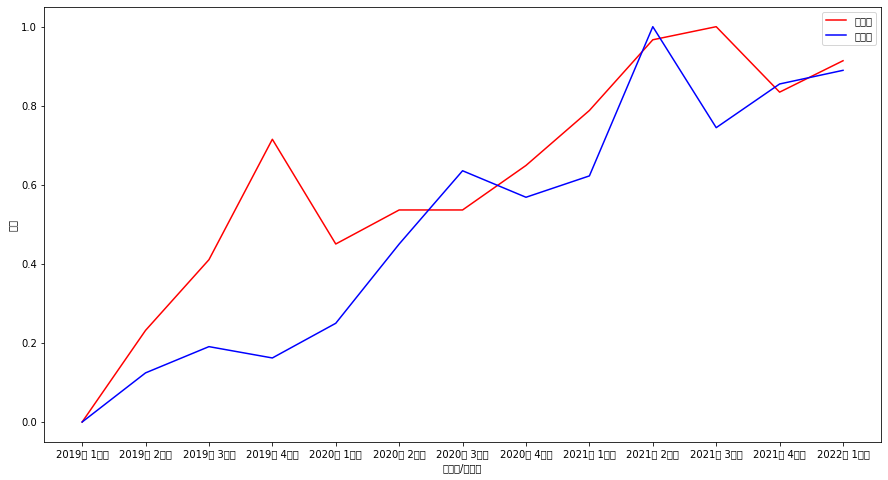

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     30.87
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000171
Time:                        13:32:51   Log-Likelihood:                 6.5539
No. Observations:                  13   AIC:                            -9.108
Df Residuals:                      11   BIC:                            -7.978
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2300      0.083      2.786      0.0

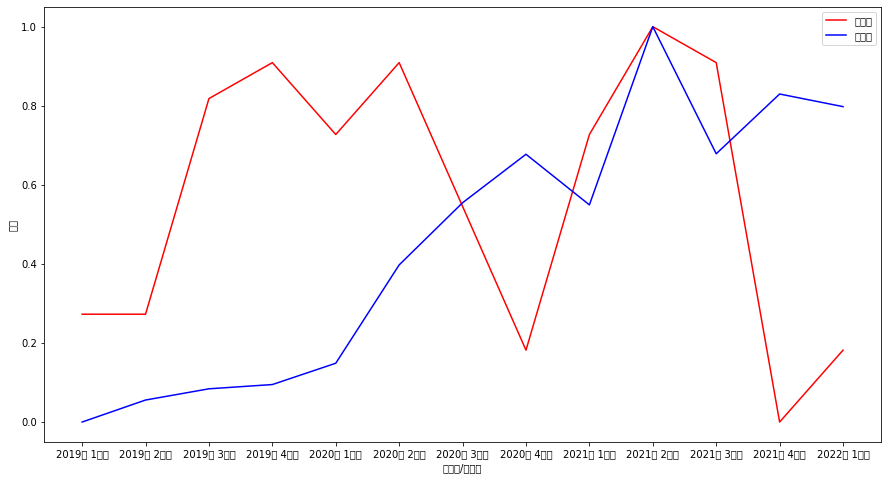

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.1046
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.752
Time:                        13:32:52   Log-Likelihood:                -4.1024
No. Observations:                  13   AIC:                             12.20
Df Residuals:                      11   BIC:                             13.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6179      0.170      3.636      0.0

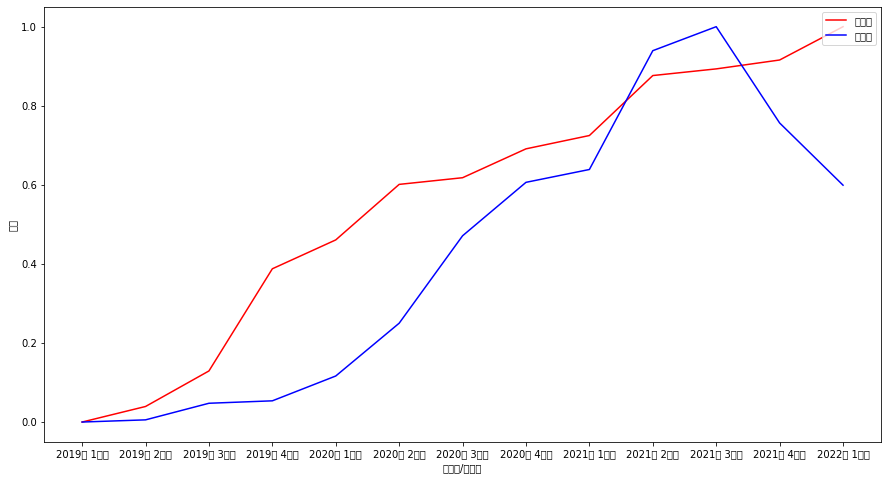

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     41.50
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.79e-05
Time:                        13:32:52   Log-Likelihood:                 6.2434
No. Observations:                  13   AIC:                            -8.487
Df Residuals:                      11   BIC:                            -7.357
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2124      0.071      2.998      0.0

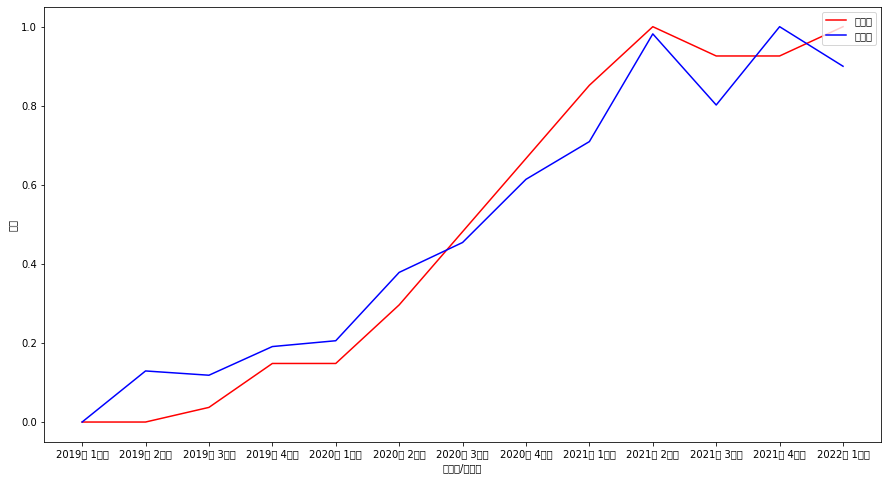

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     340.2
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.27e-09
Time:                        13:32:52   Log-Likelihood:                 16.175
No. Observations:                  13   AIC:                            -28.35
Df Residuals:                      11   BIC:                            -27.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0666      0.037     -1.793      0.1

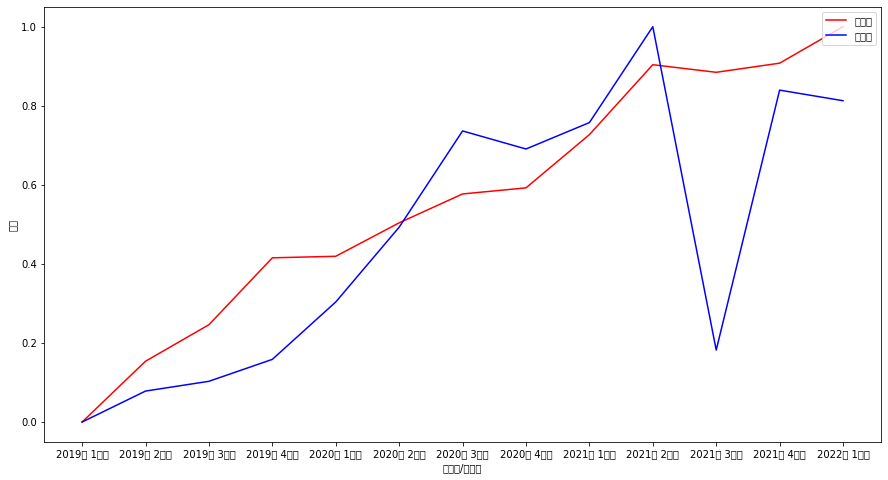

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     17.69
Date:                Mon, 16 Jan 2023   Prob (F-statistic):            0.00147
Time:                        13:32:52   Log-Likelihood:                 3.3382
No. Observations:                  13   AIC:                            -2.676
Df Residuals:                      11   BIC:                            -1.547
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2278      0.098      2.329      0.0

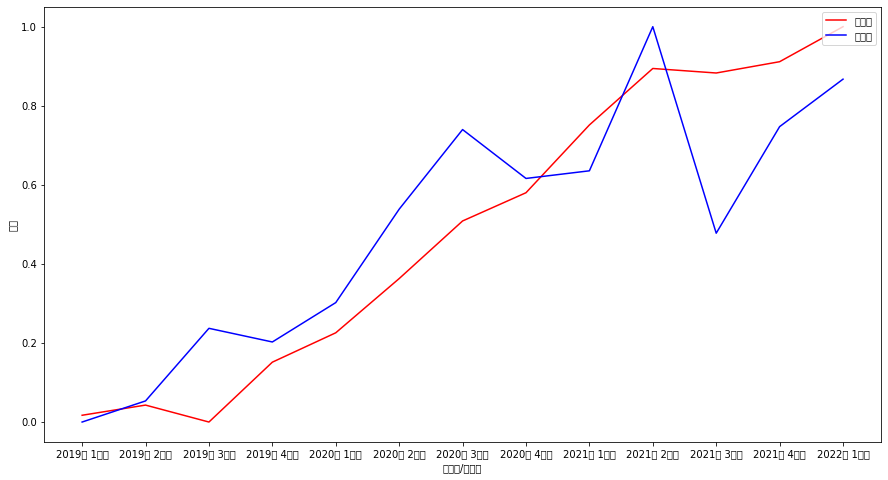

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     38.12
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           6.96e-05
Time:                        13:32:53   Log-Likelihood:                 4.5175
No. Observations:                  13   AIC:                            -5.035
Df Residuals:                      11   BIC:                            -3.905
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0339      0.099     -0.343      0.7

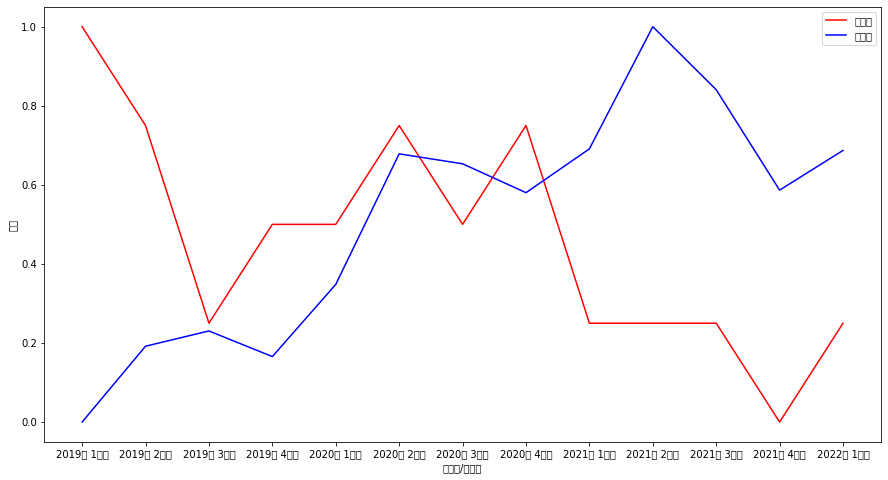

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     4.238
Date:                Mon, 16 Jan 2023   Prob (F-statistic):             0.0640
Time:                        13:32:53   Log-Likelihood:                0.47062
No. Observations:                  13   AIC:                             3.059
Df Residuals:                      11   BIC:                             4.189
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7215      0.145      4.992      0.0

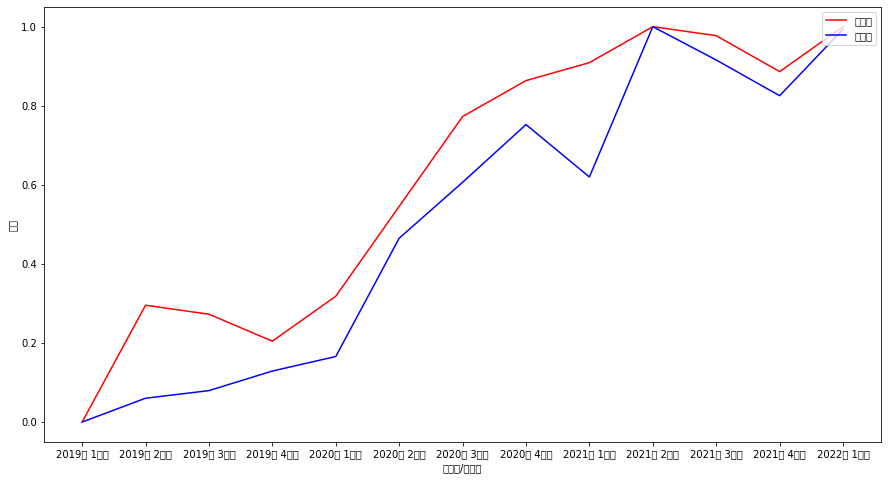

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.71e-08
Time:                        13:32:53   Log-Likelihood:                 13.989
No. Observations:                  13   AIC:                            -23.98
Df Residuals:                      11   BIC:                            -22.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1543      0.043      3.615      0.0

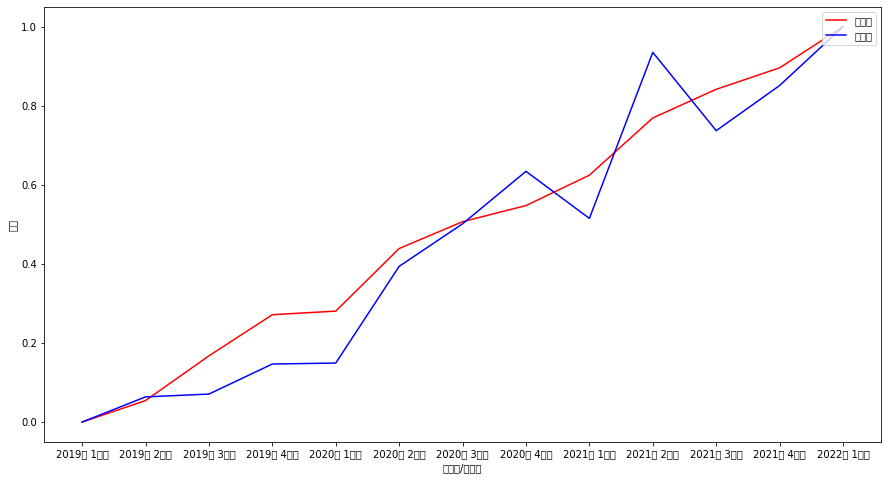

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     175.8
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.15e-08
Time:                        13:32:54   Log-Likelihood:                 15.049
No. Observations:                  13   AIC:                            -26.10
Df Residuals:                      11   BIC:                            -24.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0795      0.039      2.057      0.0

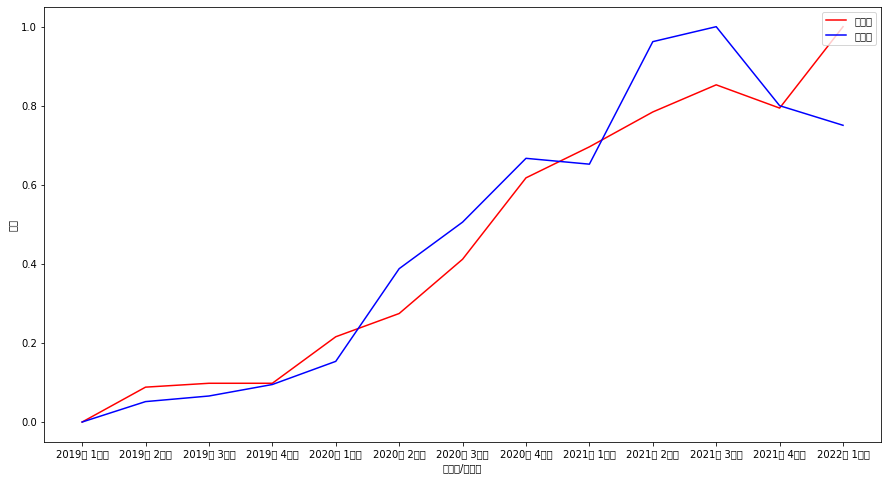

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.79e-07
Time:                        13:32:54   Log-Likelihood:                 11.339
No. Observations:                  13   AIC:                            -18.68
Df Residuals:                      11   BIC:                            -17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0297      0.051      0.582      0.5

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

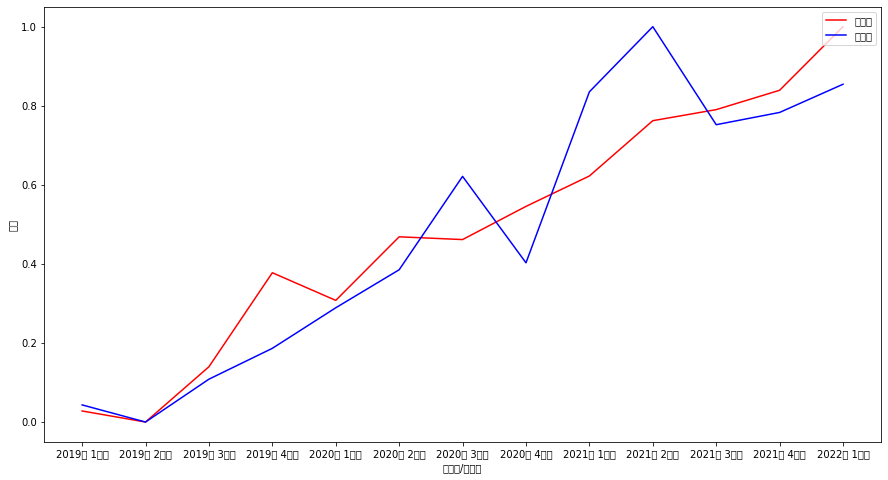

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     60.59
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           8.46e-06
Time:                        13:32:54   Log-Likelihood:                 9.2699
No. Observations:                  13   AIC:                            -14.54
Df Residuals:                      11   BIC:                            -13.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0822      0.063      1.300      0.2

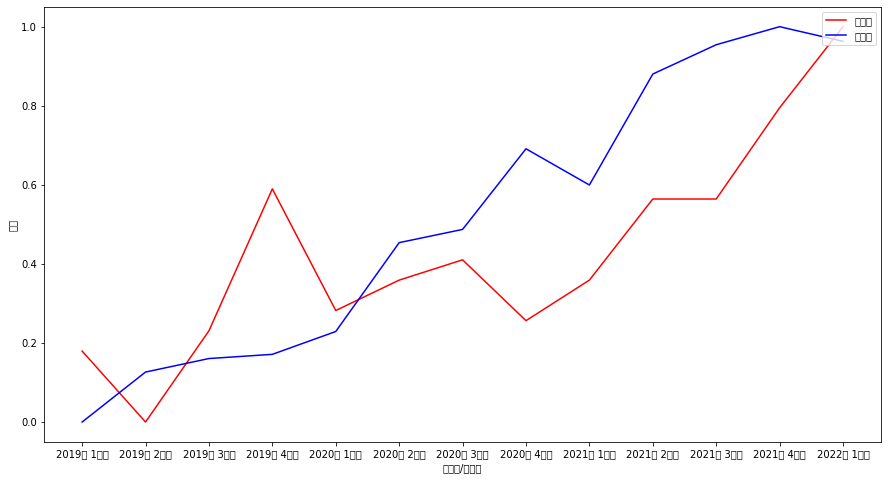

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     13.63
Date:                Mon, 16 Jan 2023   Prob (F-statistic):            0.00355
Time:                        13:32:55   Log-Likelihood:                 4.3743
No. Observations:                  13   AIC:                            -4.749
Df Residuals:                      11   BIC:                            -3.619
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1419      0.094      1.512      0.1

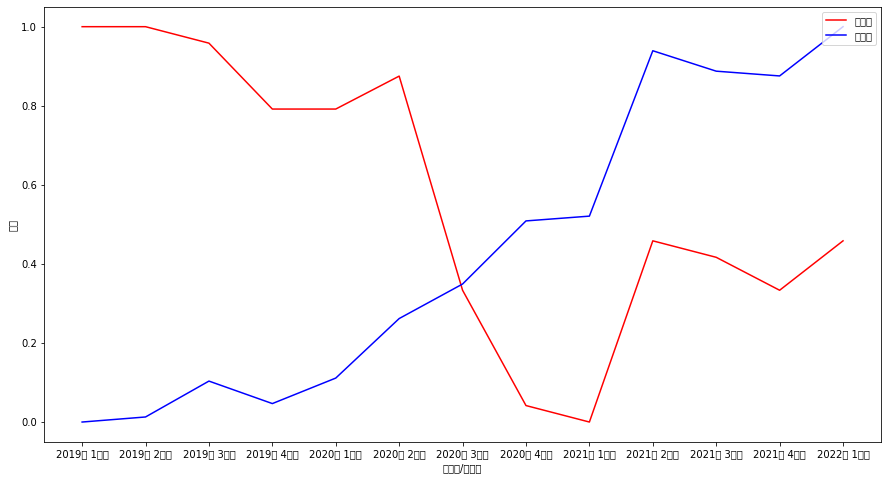

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     8.662
Date:                Mon, 16 Jan 2023   Prob (F-statistic):             0.0134
Time:                        13:32:55   Log-Likelihood:               -0.53064
No. Observations:                  13   AIC:                             5.061
Df Residuals:                      11   BIC:                             6.191
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8367      0.117      7.133      0.0

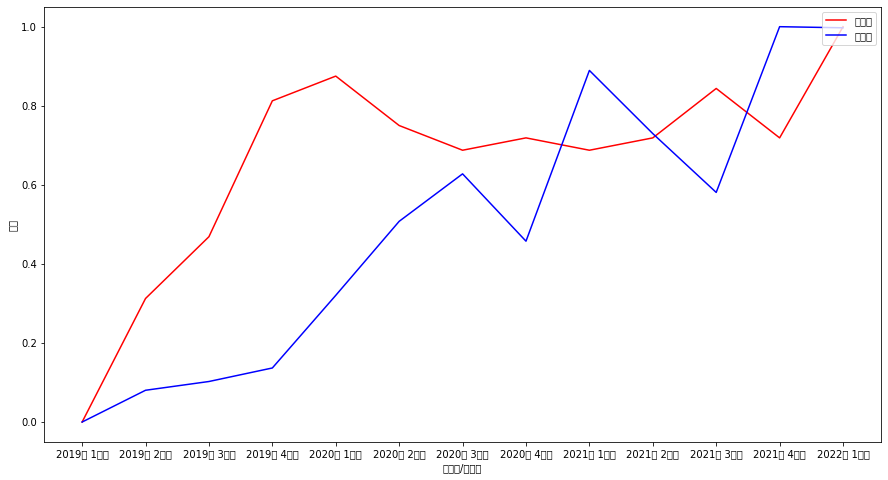

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     7.222
Date:                Mon, 16 Jan 2023   Prob (F-statistic):             0.0211
Time:                        13:32:55   Log-Likelihood:                 2.7042
No. Observations:                  13   AIC:                            -1.408
Df Residuals:                      11   BIC:                           -0.2786
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4272      0.105      4.057      0.0

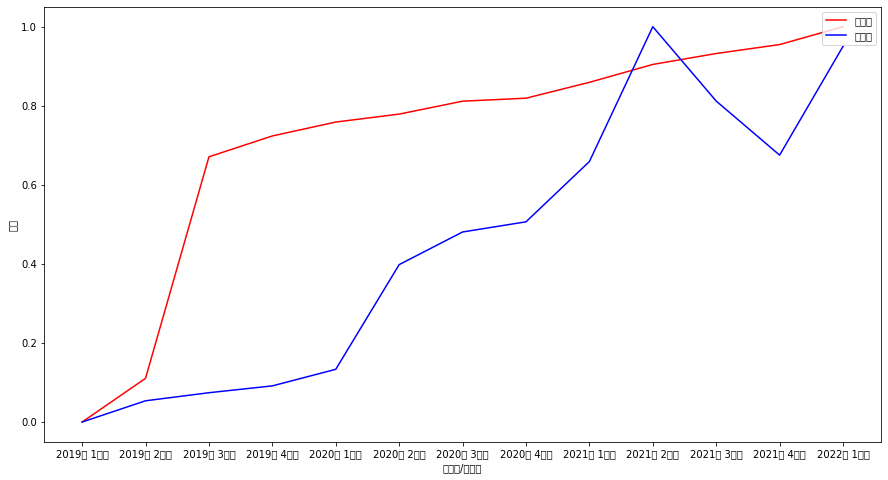

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     13.35
Date:                Mon, 16 Jan 2023   Prob (F-statistic):            0.00380
Time:                        13:32:55   Log-Likelihood:                 2.4974
No. Observations:                  13   AIC:                           -0.9948
Df Residuals:                      11   BIC:                            0.1351
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4280      0.099      4.304      0.0

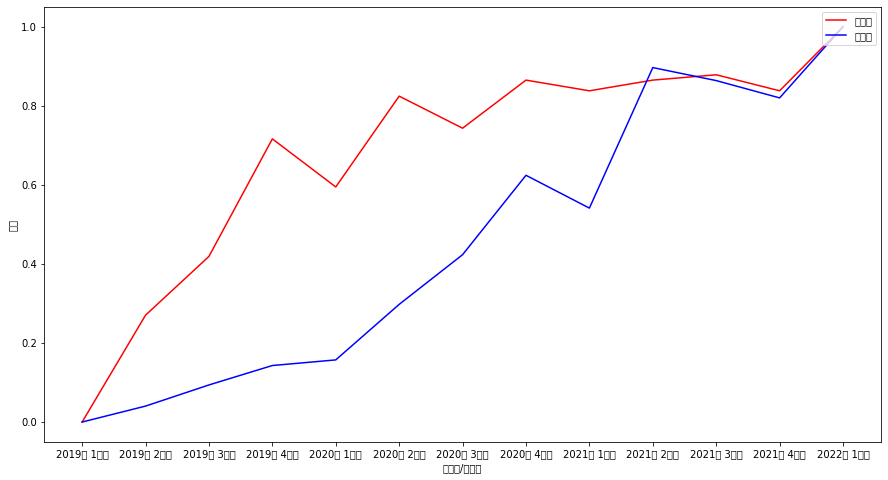

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     20.80
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000816
Time:                        13:32:56   Log-Likelihood:                 5.1798
No. Observations:                  13   AIC:                            -6.360
Df Residuals:                      11   BIC:                            -5.230
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3872      0.081      4.786      0.0

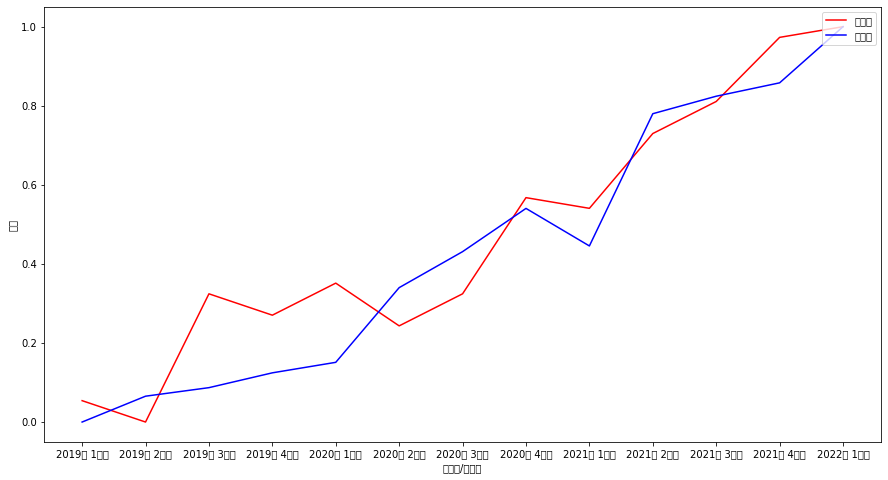

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     93.53
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.03e-06
Time:                        13:32:56   Log-Likelihood:                 11.291
No. Observations:                  13   AIC:                            -18.58
Df Residuals:                      11   BIC:                            -17.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0861      0.051      1.700      0.1

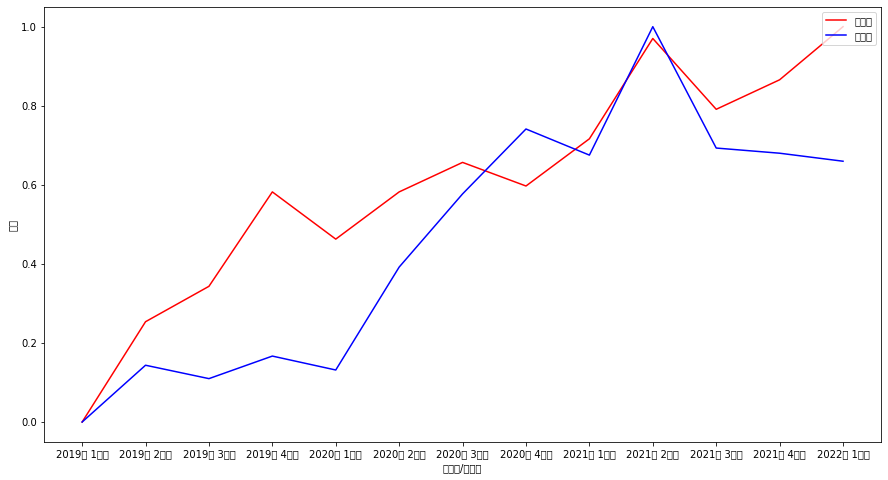

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     31.95
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000148
Time:                        13:32:56   Log-Likelihood:                 7.1711
No. Observations:                  13   AIC:                            -10.34
Df Residuals:                      11   BIC:                            -9.212
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2434      0.076      3.202      0.0

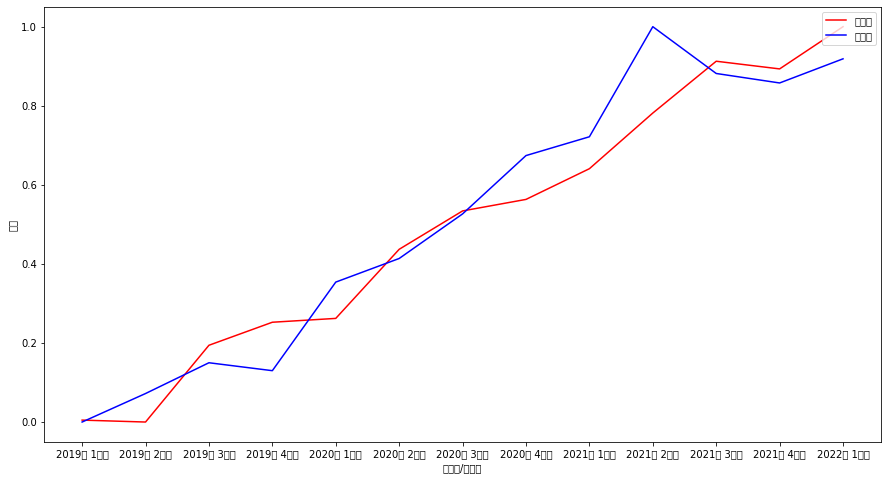

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           9.65e-08
Time:                        13:32:56   Log-Likelihood:                 13.503
No. Observations:                  13   AIC:                            -23.01
Df Residuals:                      11   BIC:                            -21.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0190      0.047      0.405      0.6

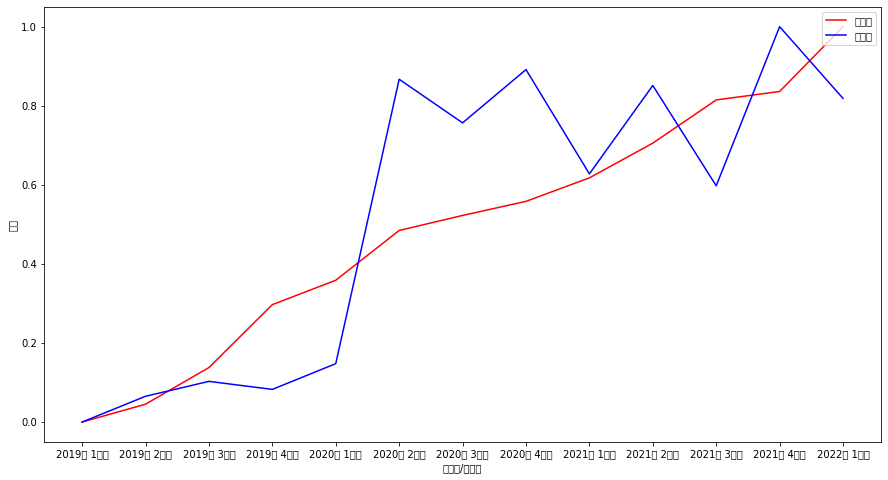

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     26.02
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000343
Time:                        13:32:57   Log-Likelihood:                 5.0916
No. Observations:                  13   AIC:                            -6.183
Df Residuals:                      11   BIC:                            -5.053
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1307      0.086      1.519      0.1

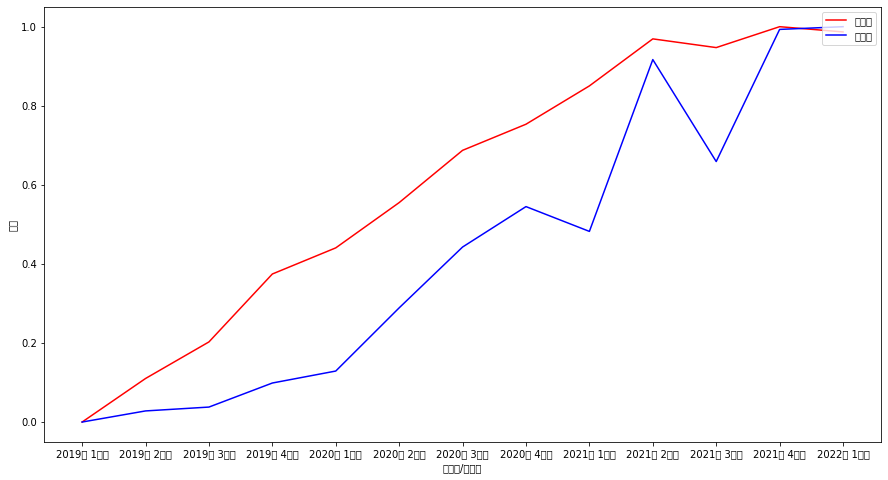

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     75.96
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.87e-06
Time:                        13:32:57   Log-Likelihood:                 9.0476
No. Observations:                  13   AIC:                            -14.10
Df Residuals:                      11   BIC:                            -12.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2232      0.057      3.914      0.0

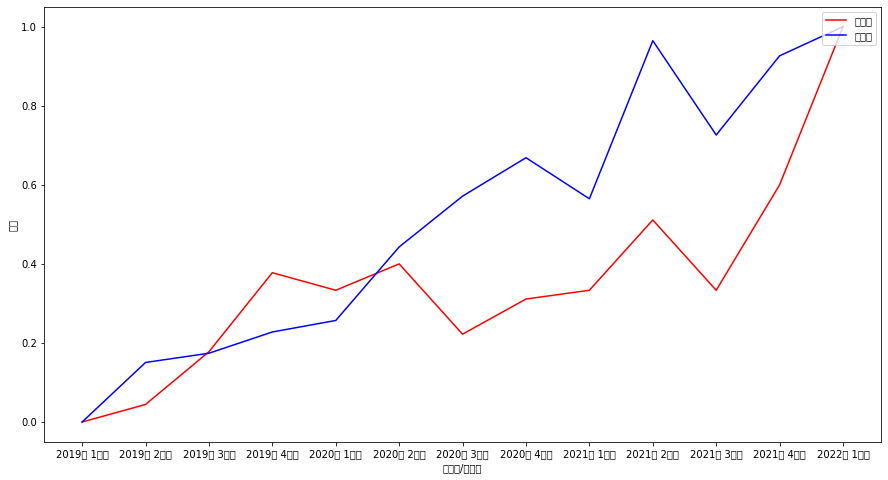

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     19.14
Date:                Mon, 16 Jan 2023   Prob (F-statistic):            0.00111
Time:                        13:32:57   Log-Likelihood:                 6.4109
No. Observations:                  13   AIC:                            -8.822
Df Residuals:                      11   BIC:                            -7.692
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0466      0.084      0.556      0.5

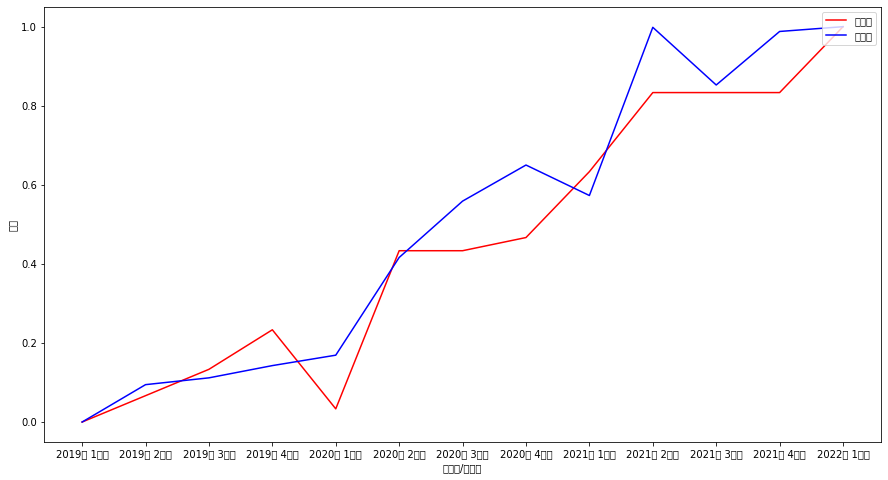

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     177.9
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.90e-08
Time:                        13:32:58   Log-Likelihood:                 14.304
No. Observations:                  13   AIC:                            -24.61
Df Residuals:                      11   BIC:                            -23.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0050      0.042      0.120      0.9

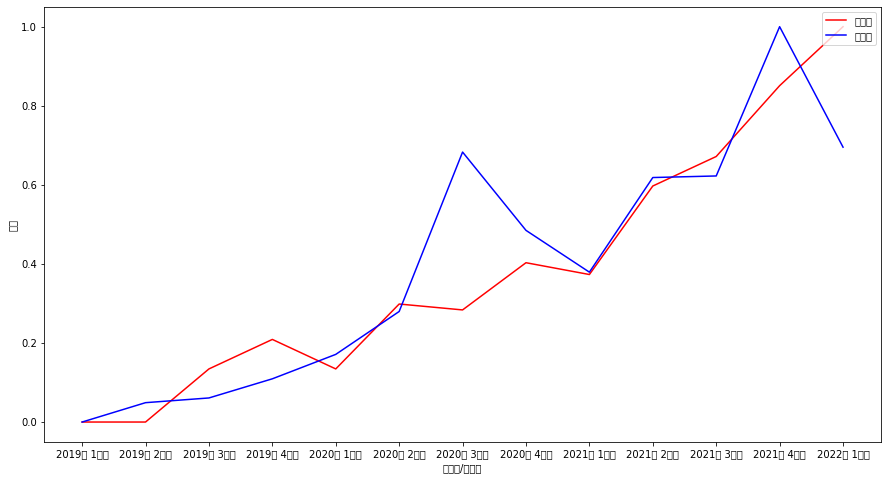

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     35.39
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           9.61e-05
Time:                        13:32:58   Log-Likelihood:                 6.4313
No. Observations:                  13   AIC:                            -8.863
Df Residuals:                      11   BIC:                            -7.733
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0332      0.073      0.452      0.6

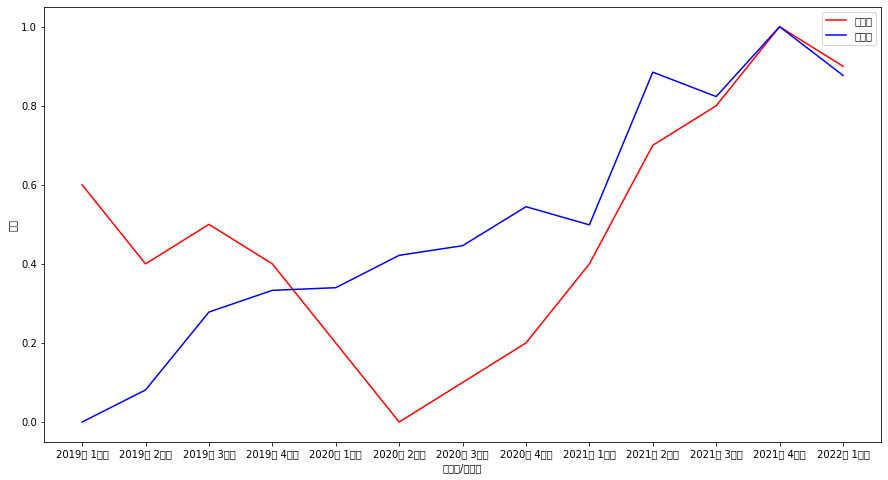

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 

                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     5.548
Date:                Mon, 16 Jan 2023   Prob (F-statistic):             0.0381
Time:                        13:32:58   Log-Likelihood:               -0.10145
No. Observations:                  13   AIC:                             4.203
Df Residuals:                      11   BIC:                             5.333
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1887      0.143      1.322      0.2

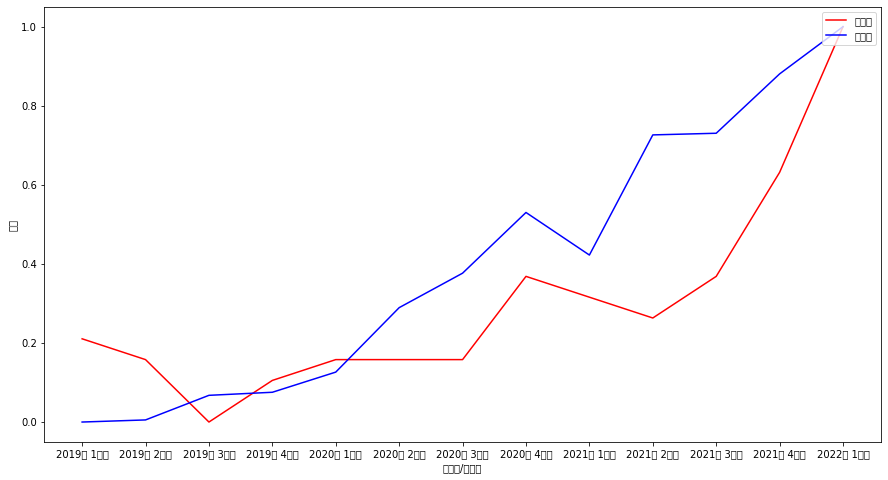

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     25.22
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000389
Time:                        13:32:58   Log-Likelihood:                 7.2013
No. Observations:                  13   AIC:                            -10.40
Df Residuals:                      11   BIC:                            -9.273
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0454      0.066      0.691      0.5

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

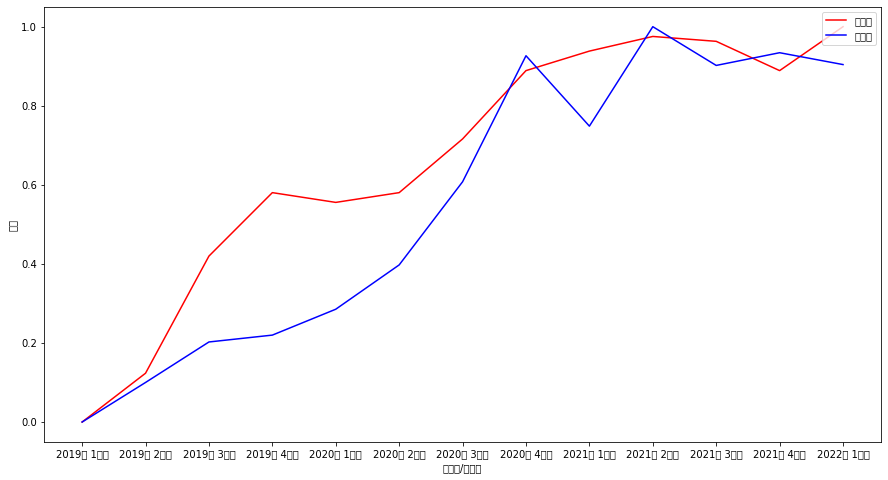

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                    점포수   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     79.86
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.25e-06
Time:                        13:32:59   Log-Likelihood:                 10.261
No. Observations:                  13   AIC:                            -16.52
Df Residuals:                      11   BIC:                            -15.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1962      0.062      3.168      0.0

In [60]:
for place in place_list:
  plot_corr(place)

## 통계분석 (One sample t-test로 평균적인 상관계수가 유의미한지 검증)

In [35]:
from scipy import stats

In [61]:
corr = np.array(corr_list)

In [62]:
t_stat, p_value = stats.ttest_1samp(corr, 0.7)
print('t_statistics : {}, p_value : {}'.format(t_stat, p_value)) #p_value가 0.98로 유의미하다고 판단

t_statistics : 0.017988380977765412, p_value : 0.9857672282276679
